In [295]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [296]:
df=pd.read_csv(r'E:\IRISFLOWERCLASSIFICATION\data\IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [298]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [299]:
X=df.drop('species',axis=1)
y=df['species']

In [300]:
X.head(),y.head()

(   sepal_length  sepal_width  petal_length  petal_width
 0           5.1          3.5           1.4          0.2
 1           4.9          3.0           1.4          0.2
 2           4.7          3.2           1.3          0.2
 3           4.6          3.1           1.5          0.2
 4           5.0          3.6           1.4          0.2,
 0    Iris-setosa
 1    Iris-setosa
 2    Iris-setosa
 3    Iris-setosa
 4    Iris-setosa
 Name: species, dtype: object)

## Segregating numerical and Categorical Columns:-

In [301]:
numerical_columns=X.select_dtypes(exclude='O')
categorical_columns=X.select_dtypes(include='O')

In [302]:
numerical_columns.columns.tolist()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [303]:
numerical_columns

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


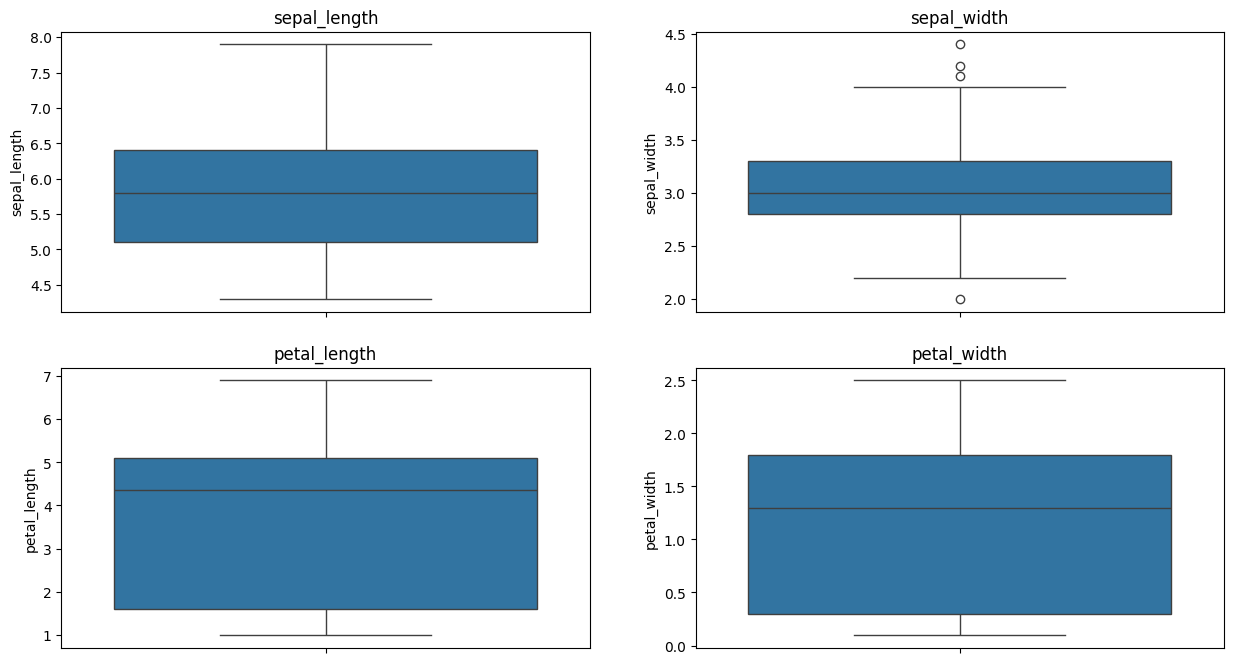

In [304]:
plt.figure(figsize=(15,8))
j=1
for i in X:
    plt.subplot(2,2,j)
    plt.title(i)
    sns.boxplot(df[i])
    j=j+1
plt.show()

### Pipeline Intiated:-

In [305]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


In [306]:
num_pipeline=Pipeline(steps=[
    ('Imputer',SimpleImputer(strategy='median')),
    ('Scaler',StandardScaler())
])

cat_pipeline=Pipeline(steps=[
    ('Imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(sparse_output=False)),
    ('Scaler',StandardScaler())
    
])

In [307]:
preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_columns.columns.tolist()),
    ('cat_pipeline',cat_pipeline,categorical_columns.columns.tolist())
])

In [308]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('Imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('Scaler', StandardScaler())]),
                                 ['sepal_length', 'sepal_width', 'petal_length',
                                  'petal_width']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('Imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(sparse_output=False)),
                                                 ('Scaler', StandardScaler())]),
                                 [])])

In [309]:
from sklearn.model_selection import train_test_split

In [310]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.10,random_state=42)

In [311]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((135, 4), (135,), (15, 4), (15,))

In [312]:
x_train=preprocessor.fit_transform(X_train)
x_test=preprocessor.transform(X_test)

In [313]:
X_train=pd.DataFrame(x_train,columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(x_test,columns=preprocessor.get_feature_names_out())

In [314]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [315]:
models={
    'LogisticRegression':LogisticRegression(),
    'SVC':SVC(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier(algorithm='auto',p=2)
}

In [316]:
params={
    "LogisticRegression": {
        'penalty':['l1', 'l2', 'elasticnet', None],
        'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
    },
    
    
    "SVC":{
        # 'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],      
    },
    
    
    'DecisionTreeClassifier':{
        'criterion':['gini', 'entropy', 'log_loss'],
        'max_depth':[5,10,15,20,25,30,35,40],
        'splitter':['best','random']
        },
    
    
    
    'RandomForestClassifier':{
        'n_estimators': [10,20,30,40,50,60,70,80],
        'criterion':['gini', 'entropy', 'log_loss'],
        'max_depth':[5,10,15,20,25]
        # ,'learning_rate':[.1,.01,.05,.001]
    },
    
    'GradientBoostingClassifier':{
        'loss':['log_loss','exponential'],
        'n_estimators':[50,100,150],
        'criterion':['friedman_mse','squared_error'],
        'learning_rate':[.1,.01,.05,.001]
    },
    
    
    
    'AdaBoostClassifier':{
        'n_estimators':[50,100,150,200],
        'algorithm':['SAMME', 'SAMME.R'],
        'learning_rate':[.1,.01,.05,.001]  
    },
    
    
    
    
    'KNeighborsClassifier':{
        'n_neighbors':[3,4,5,6,7,8]
    }
    
    
    
}

In [317]:
from sklearn.metrics import accuracy_score

In [318]:
from sklearn.model_selection import GridSearchCV
def get_best_model(X_train,y_train,X_test,y_test,model_dict,params_,base_accuracy=0.7):
    models = model_dict.keys()
    for model in models:
        print(f'Initial base accuracy is {base_accuracy}')
        print(20*'*',"Estimator: ",model,20*'*')
        gs = GridSearchCV(estimator=model_dict[model],param_grid=params_[model],cv=3)
        gs.fit(X_train,y_train)
        print(f'Best parameters are :{gs.best_params_} With accuracy score:{gs.best_score_}')
        
        regressor = model_dict[model].set_params(**gs.best_params_)
        regressor.fit(X_train,y_train)

        y_train_pred = regressor.predict(X_train)
        y_test_pred = regressor.predict(X_test)
        
        train_model_score = accuracy_score(y_train, y_train_pred)

        test_model_score = accuracy_score(y_test, y_test_pred)
        
        if test_model_score >= base_accuracy:
            print('Acceptabel model found!')
            base_accuracy = test_model_score
            best_model = {model:regressor}
        else:
            print('Model rejected\n',30*'__')
            
    
    print(f"Best model is:{list(best_model.keys())} with accuracy score: {round(test_model_score,2)}")        
    return best_model

In [319]:
warnings.filterwarnings('ignore')

In [320]:
get_best_model(X_train,Y_train,X_test,Y_test,model_dict=models,params_=params)

Initial base accuracy is 0.7
******************** Estimator:  LogisticRegression ********************
Best parameters are :{'penalty': 'l1', 'solver': 'saga'} With accuracy score:0.9629629629629629
Acceptabel model found!
Initial base accuracy is 1.0
******************** Estimator:  SVC ********************
Best parameters are :{} With accuracy score:0.9481481481481482
Acceptabel model found!
Initial base accuracy is 1.0
******************** Estimator:  DecisionTreeClassifier ********************
Best parameters are :{'criterion': 'gini', 'max_depth': 30, 'splitter': 'random'} With accuracy score:0.9629629629629629
Model rejected
 ____________________________________________________________
Initial base accuracy is 1.0
******************** Estimator:  RandomForestClassifier ********************
Best parameters are :{'criterion': 'log_loss', 'max_depth': 5, 'n_estimators': 10} With accuracy score:0.9703703703703703
Acceptabel model found!
Initial base accuracy is 1.0
*******************

{'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=7)}

In [321]:
model=RandomForestClassifier(criterion='log_loss',max_depth=5,n_estimators=10)
model.fit(X_train,Y_train)

RandomForestClassifier(criterion='log_loss', max_depth=5, n_estimators=10)

In [322]:
y_pred=model.predict(X_test)
accuracy_score(Y_test,y_pred)

1.0